In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings
warnings.simplefilter("ignore")

In [39]:
file_path = 'hackathon 2024 - Yapay Zeka.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [40]:
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

df['weekday'] = df['TIME_STAMP'].dt.weekday
df['is_weekend'] = df['TIME_STAMP'].dt.weekday >= 5
df['hour'] = df['TIME_STAMP'].dt.hour
df['minute'] = df['TIME_STAMP'].dt.minute

def is_holiday(date):
    holidays = [
        '2024-01-01',  # New Year
        '2024-04-10',  # Ramadan Eid
        '2024-04-11',  # Ramadan Eid
        '2024-04-12',  # Ramadan Eid
        '2024-04-23',  # National Sovereignty and Children's Day
        '2024-05-01',  # Labor and Solidarity Day
        '2024-06-16',  # Eid al-Adha
        '2024-06-17',  # Eid al-Adha
        '2024-06-18',  # Eid al-Adha
        '2024-06-19',  # Eid al-Adha
        '2024-05-19',  # Commemoration of Atatürk, Youth and Sports Day
        '2024-07-15',  # Democracy and National Unity Day
        '2024-08-30',  # Victory Day
        '2024-10-29'   # Republic Day
    ]
    return date.strftime('%Y-%m-%d') in holidays

df['is_holiday'] = df['TIME_STAMP'].apply(is_holiday)

print(df.head())

           TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  weekday  \
0 2024-03-05 18:25:00  10.0.901.xx Server 1  11927.017  424.700        1   
1 2024-03-05 18:20:00  10.0.901.xx Server 1  19703.467  525.575        1   
2 2024-03-05 18:15:00  10.0.901.xx Server 1  26349.663  631.144        1   
3 2024-03-05 18:10:00  10.0.901.xx Server 1  26068.494  623.673        1   
4 2024-03-05 18:05:00  10.0.901.xx Server 1  25814.357  620.701        1   

   is_weekend  hour  minute  is_holiday  
0       False    18      25       False  
1       False    18      20       False  
2       False    18      15       False  
3       False    18      10       False  
4       False    18       5       False  


In [41]:
df['DOWNLOAD'].fillna(df['DOWNLOAD'].median(), inplace=True)
df['UPLOAD'].fillna(df['UPLOAD'].median(), inplace=True)

In [42]:
features = ['weekday', 'is_weekend', 'hour', 'minute', 'is_holiday', 'DOWNLOAD', 'UPLOAD']

X = df[features]

In [43]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [44]:
def check_for_anomaly(timestamp, server_name, download, upload):
    input_data = {
        'TIME_STAMP': pd.to_datetime(timestamp),
        'SERVER_NAME': server_name,
        'DOWNLOAD': float(download.replace(',', '.')),
        'UPLOAD': float(upload.replace(',', '.'))
    }
    input_df = pd.DataFrame([input_data])
    
    input_df['weekday'] = input_df['TIME_STAMP'].dt.weekday
    input_df['is_weekend'] = input_df['TIME_STAMP'].dt.weekday >= 5
    input_df['hour'] = input_df['TIME_STAMP'].dt.hour
    input_df['minute'] = input_df['TIME_STAMP'].dt.minute
    input_df['is_holiday'] = input_df['TIME_STAMP'].apply(is_holiday)
    
    input_X = input_df[features]
    
    # Predict anomaly
    anomaly = iso_forest.predict(input_X)[0]
    
    # Return 'yes' for anomaly and 'no' for normal
    return 'yes' if anomaly == -1 else 'no'

timestamp = input("Enter the timestamp (YYYY-MM-DD HH:MM:SS): ")
server_name = input("Enter the server name: ")
download = input("Enter the download amount: ")
upload = input("Enter the upload amount: ")

result = check_for_anomaly(timestamp, server_name, download, upload)
print(result)

Enter the timestamp (YYYY-MM-DD HH:MM:SS): 2024-03-05 18:25:00
Enter the server name: 10.0.901.xx Server 1
Enter the download amount: 11927,017
Enter the upload amount: 424,7
no


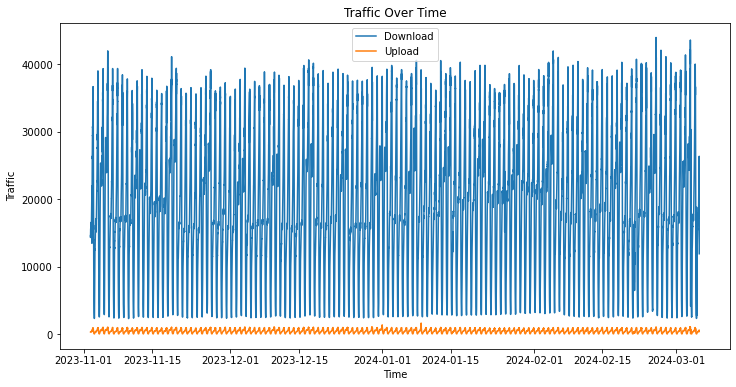

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['TIME_STAMP'], df['DOWNLOAD'], label='Download')
plt.plot(df['TIME_STAMP'], df['UPLOAD'], label='Upload')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.title('Traffic Over Time')
plt.show()

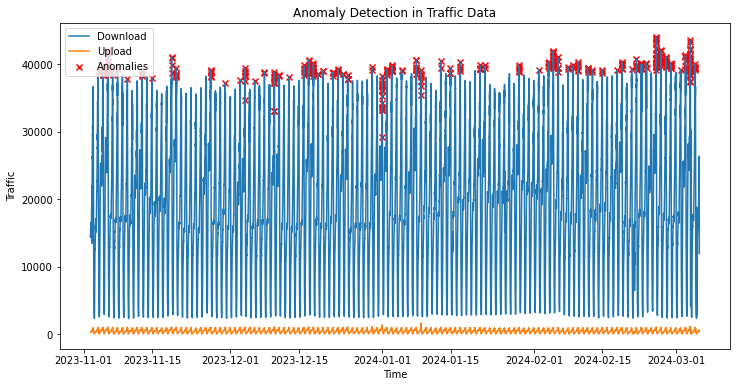

             TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  weekday  \
228 2024-03-04 23:10:00  10.0.901.xx Server 1  39386.021  969.410        0   
231 2024-03-04 22:55:00  10.0.901.xx Server 1  39630.653  977.985        0   
232 2024-03-04 22:50:00  10.0.901.xx Server 1  39432.158  981.907        0   
233 2024-03-04 22:45:00  10.0.901.xx Server 1  39091.678  977.528        0   
234 2024-03-04 22:40:00  10.0.901.xx Server 1  39359.556  982.403        0   

     is_weekend  hour  minute  is_holiday  ANOMALY  
228       False    23      10       False       -1  
231       False    22      55       False       -1  
232       False    22      50       False       -1  
233       False    22      45       False       -1  
234       False    22      40       False       -1  


In [37]:
df_clean = df.dropna()

X = df_clean[['DOWNLOAD', 'UPLOAD']]

iso_forest = IsolationForest(contamination=0.01)
df_clean = df_clean.copy()
df_clean['ANOMALY'] = iso_forest.fit_predict(X)

anomalies = df_clean[df_clean['ANOMALY'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(df_clean['TIME_STAMP'], df_clean['DOWNLOAD'], label='Download')
plt.plot(df_clean['TIME_STAMP'], df_clean['UPLOAD'], label='Upload')
plt.scatter(anomalies['TIME_STAMP'], anomalies['DOWNLOAD'], color='red', label='Anomalies', marker='x')
plt.xlabel('Time')
plt.ylabel('Traffic')
plt.legend()
plt.title('Anomaly Detection in Traffic Data')
plt.show()

print(anomalies.head())